# Unsupervised ML (Clustering)

In [12]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the dataset
df=pd.read_csv("D:\\FlipRobo\\Capstone project\\India_Crime - Copy\\01_District_wise_crimes_committed_IPC_2001_2012.csv")
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [4]:
df['DISTRICT'].unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'EAST GODAVARI',
       'GUNTAKAL RLY.', 'GUNTUR', 'HYDERABAD CITY', 'KARIMNAGAR',
       'KHAMMAM', 'KRISHNA', 'KURNOOL', 'MAHABOOBNAGAR', 'MEDAK',
       'NALGONDA', 'NELLORE', 'NIZAMABAD', 'PRAKASHAM', 'RANGA REDDY',
       'SECUNDERABAD RLY.', 'SRIKAKULAM', 'VIJAYAWADA', 'VIJAYAWADA RLY.',
       'VISAKHA RURAL', 'VISAKHAPATNAM', 'VIZIANAGARAM', 'WARANGAL',
       'WEST GODAVARI', 'TOTAL', 'CHANGLANG', 'DIBANG VALLEY',
       'KAMENG EAST', 'KAMENG WEST', 'LOHIT', 'PAPUM PARE', 'SIANG EAST',
       'SIANG UPPER', 'SIANG WEST', 'SUBANSIRI LOWER', 'SUBANSIRI UPPER',
       'TAWANG', 'TIRAP', 'BARPETA', 'BONGAIGAON', 'C.I.D.', 'CACHAR',
       'DARRANG', 'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'G.R.P.', 'GOALPARA',
       'GOLAGHAT', 'GUWAHATI CITY', 'HAILAKANDI', 'JORHAT', 'KAMRUP',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MORIGAON',
       'N.C.HILLS', 'NAGAON', 'NALBARI', 'R.P.O.', 'SIBSAGAR', 'SONITPUR',
    

In [5]:
df[df['DISTRICT']=='TOTAL']

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
28,ANDHRA PRADESH,TOTAL,2001,2602,1555,136,871,0,871,1182,...,872,34947,420,3544,2271,5791,7,7400,34344,130089
42,ARUNACHAL PRADESH,TOTAL,2001,83,53,3,33,0,33,83,...,13,466,0,78,3,11,0,0,618,2342
70,ASSAM,TOTAL,2001,1356,481,40,817,0,817,1480,...,441,5805,59,850,4,1248,0,2010,9315,36877
115,BIHAR,TOTAL,2001,3643,3419,250,888,0,888,2159,...,502,7544,859,562,21,1558,83,2406,36667,88432
135,CHHATTISGARH,TOTAL,2001,880,529,45,959,0,959,207,...,215,5477,70,1763,161,840,0,689,15790,38460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8988,CHANDIGARH,TOTAL,2012,21,44,5,27,0,27,87,...,9,42,5,45,25,73,0,3,1042,3606
8990,D & N HAVELI,TOTAL,2012,7,2,0,3,0,3,13,...,12,25,0,2,0,0,0,23,112,318
8993,DAMAN & DIU,TOTAL,2012,3,5,0,5,0,5,3,...,11,17,0,0,0,3,0,38,46,239
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60


In [6]:
df[df['DISTRICT']=='DELHI UT TOTAL']

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
700,DELHI UT,DELHI UT TOTAL,2001,547,510,63,381,0,381,1627,...,50,2011,113,502,90,138,0,432,22000,54384
1418,DELHI UT,DELHI UT TOTAL,2002,531,440,68,403,0,403,1323,...,57,1851,135,446,128,135,0,416,20876,49137
2147,DELHI UT,DELHI UT TOTAL,2003,485,407,65,490,0,490,1156,...,60,1708,130,489,105,1211,0,402,20045,47404
2876,DELHI UT,DELHI UT TOTAL,2004,481,519,80,551,0,551,1209,...,38,1780,126,601,130,1254,0,433,22048,53623
3609,DELHI UT,DELHI UT TOTAL,2005,455,467,64,658,0,658,1590,...,47,1814,114,762,225,1324,1,634,24299,56065
4348,DELHI UT,DELHI UT TOTAL,2006,476,510,75,623,0,623,1442,...,33,1818,137,718,144,1728,0,367,26805,57963
5090,DELHI UT,DELHI UT TOTAL,2007,495,530,94,598,0,598,1688,...,31,1736,138,868,167,1787,0,252,24854,56065
5849,DELHI UT,DELHI UT TOTAL,2008,554,389,66,466,0,466,1567,...,41,1936,129,611,130,1387,0,726,17896,49350
6616,DELHI UT,DELHI UT TOTAL,2009,552,369,84,469,0,469,2536,...,34,1938,141,552,118,1283,0,846,14808,50251
7395,DELHI UT,DELHI UT TOTAL,2010,565,311,71,507,0,507,3208,...,52,1925,143,601,80,1404,0,914,14055,51292


In [8]:
# Drop rows where DISTRICT is 'TOTAL' or 'DELHI UT TOTAL'
df_filtered = df[~df['DISTRICT'].isin(['TOTAL', 'DELHI UT TOTAL'])]


In [9]:
# Checking wheather we have DISTRICT is TOTAL or NOT
df_filtered[df_filtered['DISTRICT']=='TOTAL']

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES


Hence there id no district present namely TOTAL.

In [11]:
df_filtered.T

,0,1,2,3,4,5,6,7,8,9,...,9005,9006,9007,9008,9009,9010,9011,9012,9014,9015
STATE/UT,ANDHRA PRADESH,ANDHRA PRADESH,ANDHRA PRADESH,ANDHRA PRADESH,ANDHRA PRADESH,ANDHRA PRADESH,ANDHRA PRADESH,ANDHRA PRADESH,ANDHRA PRADESH,ANDHRA PRADESH,...,DELHI UT,DELHI UT,DELHI UT,DELHI UT,DELHI UT,DELHI UT,DELHI UT,LAKSHADWEEP,PUDUCHERRY,PUDUCHERRY
DISTRICT,ADILABAD,ANANTAPUR,CHITTOOR,CUDDAPAH,EAST GODAVARI,GUNTAKAL RLY.,GUNTUR,HYDERABAD CITY,KARIMNAGAR,KHAMMAM,...,NORTH-WEST,OUTER,SOUTH,SOUTH-EAST,SOUTH-WEST,STF,WEST,LAKSHADWEEP,KARAIKAL,PUDUCHERRY
YEAR,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,...,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012
MURDER,101,151,101,80,82,3,182,111,162,93,...,60,96,39,46,47,0,52,0,5,24
ATTEMPT TO MURDER,60,125,57,53,67,1,88,113,85,60,...,37,60,19,69,48,1,37,0,6,21
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,17,1,2,1,1,0,2,7,6,1,...,8,15,3,6,6,0,10,0,2,10
RAPE,50,23,27,20,23,0,54,37,56,47,...,64,67,70,116,87,0,79,0,6,7
CUSTODIAL RAPE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTHER RAPE,50,23,27,20,23,0,54,37,56,47,...,64,67,70,116,87,0,79,0,6,7
KIDNAPPING & ABDUCTION,46,53,59,25,49,0,82,80,67,41,...,357,572,245,538,399,0,454,0,2,17


### 4.1  "Create 3 clusters as below. 1. Sensitive Area's 2. Moderate Area's 3. Peaceful Area's"



In [14]:
#for creating clustering we should not have categorical column. only numerical column is needed. hence we need to drop STATE/UT, DISTRICT, YEAR column
df_cluster=df_filtered.iloc[:,3:]
df_cluster

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,101,60,17,50,0,50,46,30,16,9,...,30,1131,16,149,34,175,0,181,1518,4154
1,151,125,1,23,0,23,53,30,23,8,...,69,1543,7,118,24,154,0,270,754,4125
2,101,57,2,27,0,27,59,34,25,4,...,38,2088,14,112,83,186,0,404,1262,5818
3,80,53,1,20,0,20,25,20,5,1,...,23,795,17,126,38,57,0,233,1181,3140
4,82,67,1,23,0,23,49,26,23,4,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
9011,52,37,10,79,0,79,454,256,198,2,...,18,227,18,53,6,327,0,292,1144,5558
9012,0,0,0,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,5,6,2,6,0,6,2,2,0,0,...,1,186,0,2,0,1,0,44,392,787


In [16]:
# creating 3 clustering 
# we need to scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

# Specify the number of clusters
n_clusters = 3

# Create KMeans instance
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model
kmeans.fit(scaled_data)

# Add cluster labels to the original DataFrame
df_filtered['Cluster'] = kmeans.labels_

#checking dataframe
df_filtered

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Cluster
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,1
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,1
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,1
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,6,0
9011,DELHI UT,WEST,2012,52,37,10,79,0,79,454,...,227,18,53,6,327,0,292,1144,5558,1
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,0,1,0,1,0,0,32,60,0
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,186,0,2,0,1,0,44,392,787,0


In [21]:
# cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df_filtered.columns[3:-1])
print("Cluster Centers:")
cluster_centers


Cluster Centers:


,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,30.421310,24.464646,3.196644,16.936787,0.001303,16.935484,22.272727,16.834148,5.438579,4.514011,...,8.268491,214.514989,6.033887,29.832193,6.438579,46.536820,0.050505,67.165689,677.783154,1553.907950
1,82.495896,77.152916,9.546868,51.976242,0.007343,51.968898,80.980994,60.058747,20.922246,11.996976,...,25.931749,770.840173,21.050972,105.314471,31.576674,206.615119,0.215119,228.691145,2096.923542,5182.924838
2,172.493056,161.138889,20.083333,103.152778,0.006944,103.145833,226.916667,149.604167,77.312500,27.284722,...,20.277778,1879.777778,37.729167,182.236111,79.402778,772.527778,0.583333,417.923611,5473.736111,16696.500000


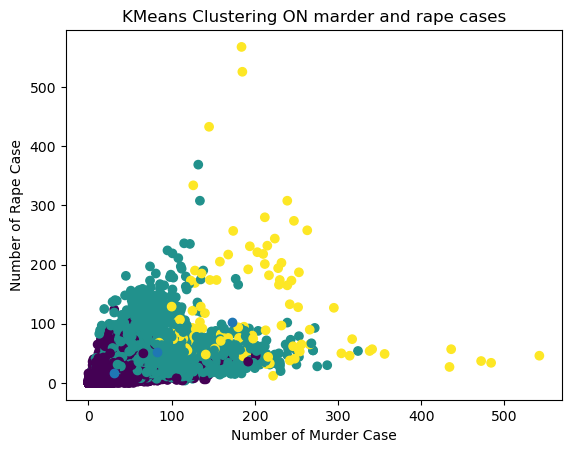

In [24]:
# Showing clusters in the column Murder And Rape
plt.scatter(df_filtered['MURDER'], df_filtered['RAPE'], c=df_filtered['Cluster'], cmap='viridis')
plt.scatter(cluster_centers['MURDER'], cluster_centers['RAPE'])
plt.title('KMeans Clustering ON marder and rape cases')
plt.xlabel('Number of Murder Case')
plt.ylabel('Number of Rape Case')
plt.show()

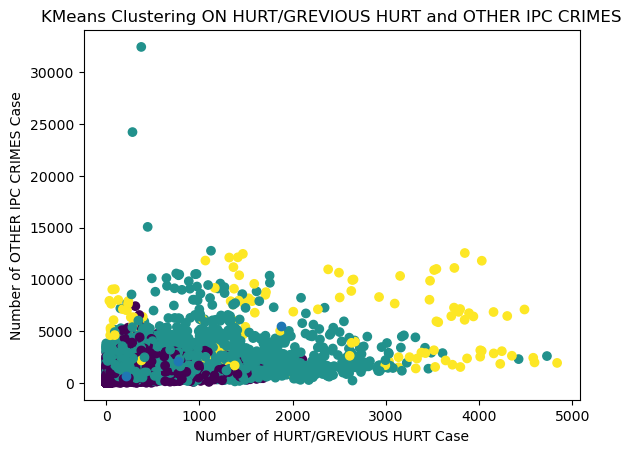

In [26]:
# Showing clusters in the column HURT/GREVIOUS HURT And OTHER IPC CRIMES
plt.scatter(df_filtered['HURT/GREVIOUS HURT'], df_filtered['OTHER IPC CRIMES'], c=df_filtered['Cluster'], cmap='viridis')
plt.scatter(cluster_centers['HURT/GREVIOUS HURT'], cluster_centers['OTHER IPC CRIMES'])
plt.title('KMeans Clustering ON HURT/GREVIOUS HURT and OTHER IPC CRIMES')
plt.xlabel('Number of HURT/GREVIOUS HURT Case')
plt.ylabel('Number of OTHER IPC CRIMES Case')
plt.show()

In [27]:
df_filtered.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Cluster'],
      dtype='object')

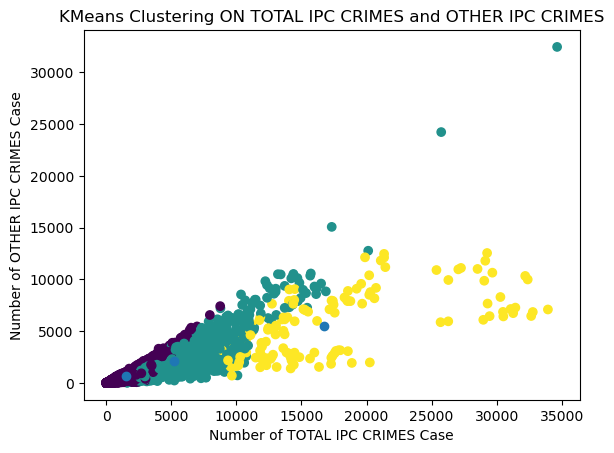

In [28]:
# Showing clusters in the column TOTAL IPC CRIMES And OTHER IPC CRIMES
plt.scatter(df_filtered['TOTAL IPC CRIMES'], df_filtered['OTHER IPC CRIMES'], c=df_filtered['Cluster'], cmap='viridis')
plt.scatter(cluster_centers['TOTAL IPC CRIMES'], cluster_centers['OTHER IPC CRIMES'])
plt.title('KMeans Clustering ON TOTAL IPC CRIMES and OTHER IPC CRIMES')
plt.xlabel('Number of TOTAL IPC CRIMES Case')
plt.ylabel('Number of OTHER IPC CRIMES Case')
plt.show()

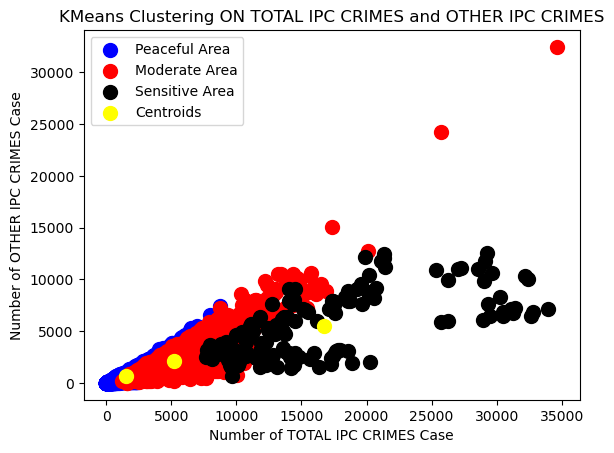

In [46]:
# Showing clusters in the column TOTAL IPC CRIMES And OTHER IPC CRIMES
plt.scatter(df_filtered[df_filtered['Cluster']==0]['TOTAL IPC CRIMES'], df_filtered[df_filtered['Cluster']==0]['OTHER IPC CRIMES'], c='blue', s=100, label='Peaceful Area')
plt.scatter(df_filtered[df_filtered['Cluster']==1]['TOTAL IPC CRIMES'], df_filtered[df_filtered['Cluster']==1]['OTHER IPC CRIMES'], c='r',s=100, label='Moderate Area')
plt.scatter(df_filtered[df_filtered['Cluster']==2]['TOTAL IPC CRIMES'], df_filtered[df_filtered['Cluster']==2]['OTHER IPC CRIMES'], c='black', s=100, label='Sensitive Area')
plt.scatter(cluster_centers['TOTAL IPC CRIMES'], cluster_centers['OTHER IPC CRIMES'], c='yellow', s=100, label='Centroids')
plt.title('KMeans Clustering ON TOTAL IPC CRIMES and OTHER IPC CRIMES')
plt.xlabel('Number of TOTAL IPC CRIMES Case')
plt.ylabel('Number of OTHER IPC CRIMES Case')
plt.legend()
plt.show()

### 4.2  Create DataFrame for each cluster that shows data according to the areas.

In [47]:
# creating dataframe for each tupe of cluster
df_peaceful_area=df_filtered[df_filtered['Cluster']==0]
df_moderate_area=df_filtered[df_filtered['Cluster']==1]
df_sensitive_area=df_filtered[df_filtered['Cluster']==2]

In [48]:
df_peaceful_area

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Cluster
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,0
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,3,1,0,0,0,0,0,...,1,0,1,0,0,0,4,104,287,0
19,ANDHRA PRADESH,SECUNDERABAD RLY.,2001,6,0,0,0,0,0,0,...,17,1,0,1,0,0,6,68,439,0
20,ANDHRA PRADESH,SRIKAKULAM,2001,38,10,4,8,0,8,12,...,679,6,38,47,108,0,167,926,2572,0
22,ANDHRA PRADESH,VIJAYAWADA RLY.,2001,2,1,0,1,0,1,0,...,9,0,1,1,0,0,2,25,320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9003,DELHI UT,NORTH,2012,25,17,2,14,0,14,153,...,92,6,29,10,70,0,13,927,2700,0
9010,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,6,0
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,0,1,0,1,0,0,32,60,0
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,186,0,2,0,1,0,44,392,787,0


In [49]:
df_moderate_area

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Cluster
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,1
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,1
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,1
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,1
6,ANDHRA PRADESH,GUNTUR,2001,182,88,2,54,0,54,82,...,1792,7,139,129,378,0,369,2426,7848,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9006,DELHI UT,OUTER,2012,96,60,15,67,0,67,572,...,224,15,79,18,244,0,90,2006,6344,1
9007,DELHI UT,SOUTH,2012,39,19,3,70,0,70,245,...,101,17,59,36,68,0,25,1651,5045,1
9008,DELHI UT,SOUTH-EAST,2012,46,69,6,116,0,116,538,...,252,11,160,43,123,0,218,2004,7040,1
9009,DELHI UT,SOUTH-WEST,2012,47,48,6,87,0,87,399,...,131,18,69,21,207,0,4,1387,4085,1


In [59]:
df_sensitive_area

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Cluster
7,ANDHRA PRADESH,HYDERABAD CITY,2001,111,113,7,37,0,37,80,...,3137,24,118,27,746,0,409,1512,11831,2
102,BIHAR,PATNA,2001,434,581,30,27,0,27,197,...,354,90,47,0,152,39,178,2825,8583,2
139,GUJARAT,AHMEDABAD COMMR.,2001,90,58,60,39,0,39,143,...,1311,7,54,27,530,0,0,6129,13496,2
255,KARNATAKA,BANGALORE COMMR.,2001,221,327,5,40,0,40,152,...,3735,40,223,51,229,0,38,11106,27254,2
370,MAHARASHTRA,MUMBAI,2001,295,200,6,127,0,127,148,...,3845,18,274,44,198,0,709,6095,28968,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8953,WEST BENGAL,24 PARGANAS NORTH,2012,140,108,80,118,0,118,497,...,79,74,196,1,1860,3,10,6062,11765,2
8954,WEST BENGAL,24 PARGANAS SOUTH,2012,224,8,28,244,0,244,419,...,234,45,83,0,1666,0,70,7641,14370,2
8971,WEST BENGAL,KOLKATA,2012,85,154,29,68,0,68,271,...,3518,19,486,377,865,9,507,10903,25370,2
8973,WEST BENGAL,MURSHIDABAD,2012,174,395,30,257,0,257,579,...,3254,39,609,6,2831,0,347,2489,12713,2


In [58]:
df_sensitive_area.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Cluster'],
      dtype='object')

### 4.3  "Analyse  clusters and prepare a report that explains all observations.

1. What is impacting more crimes in sensitive areas. 
2. What needs to be done to reduce crime. 
3. Most safe and unsafe districts.
4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"

<AxesSubplot:title={'center':'Heatmap for the correlation matrix'}>

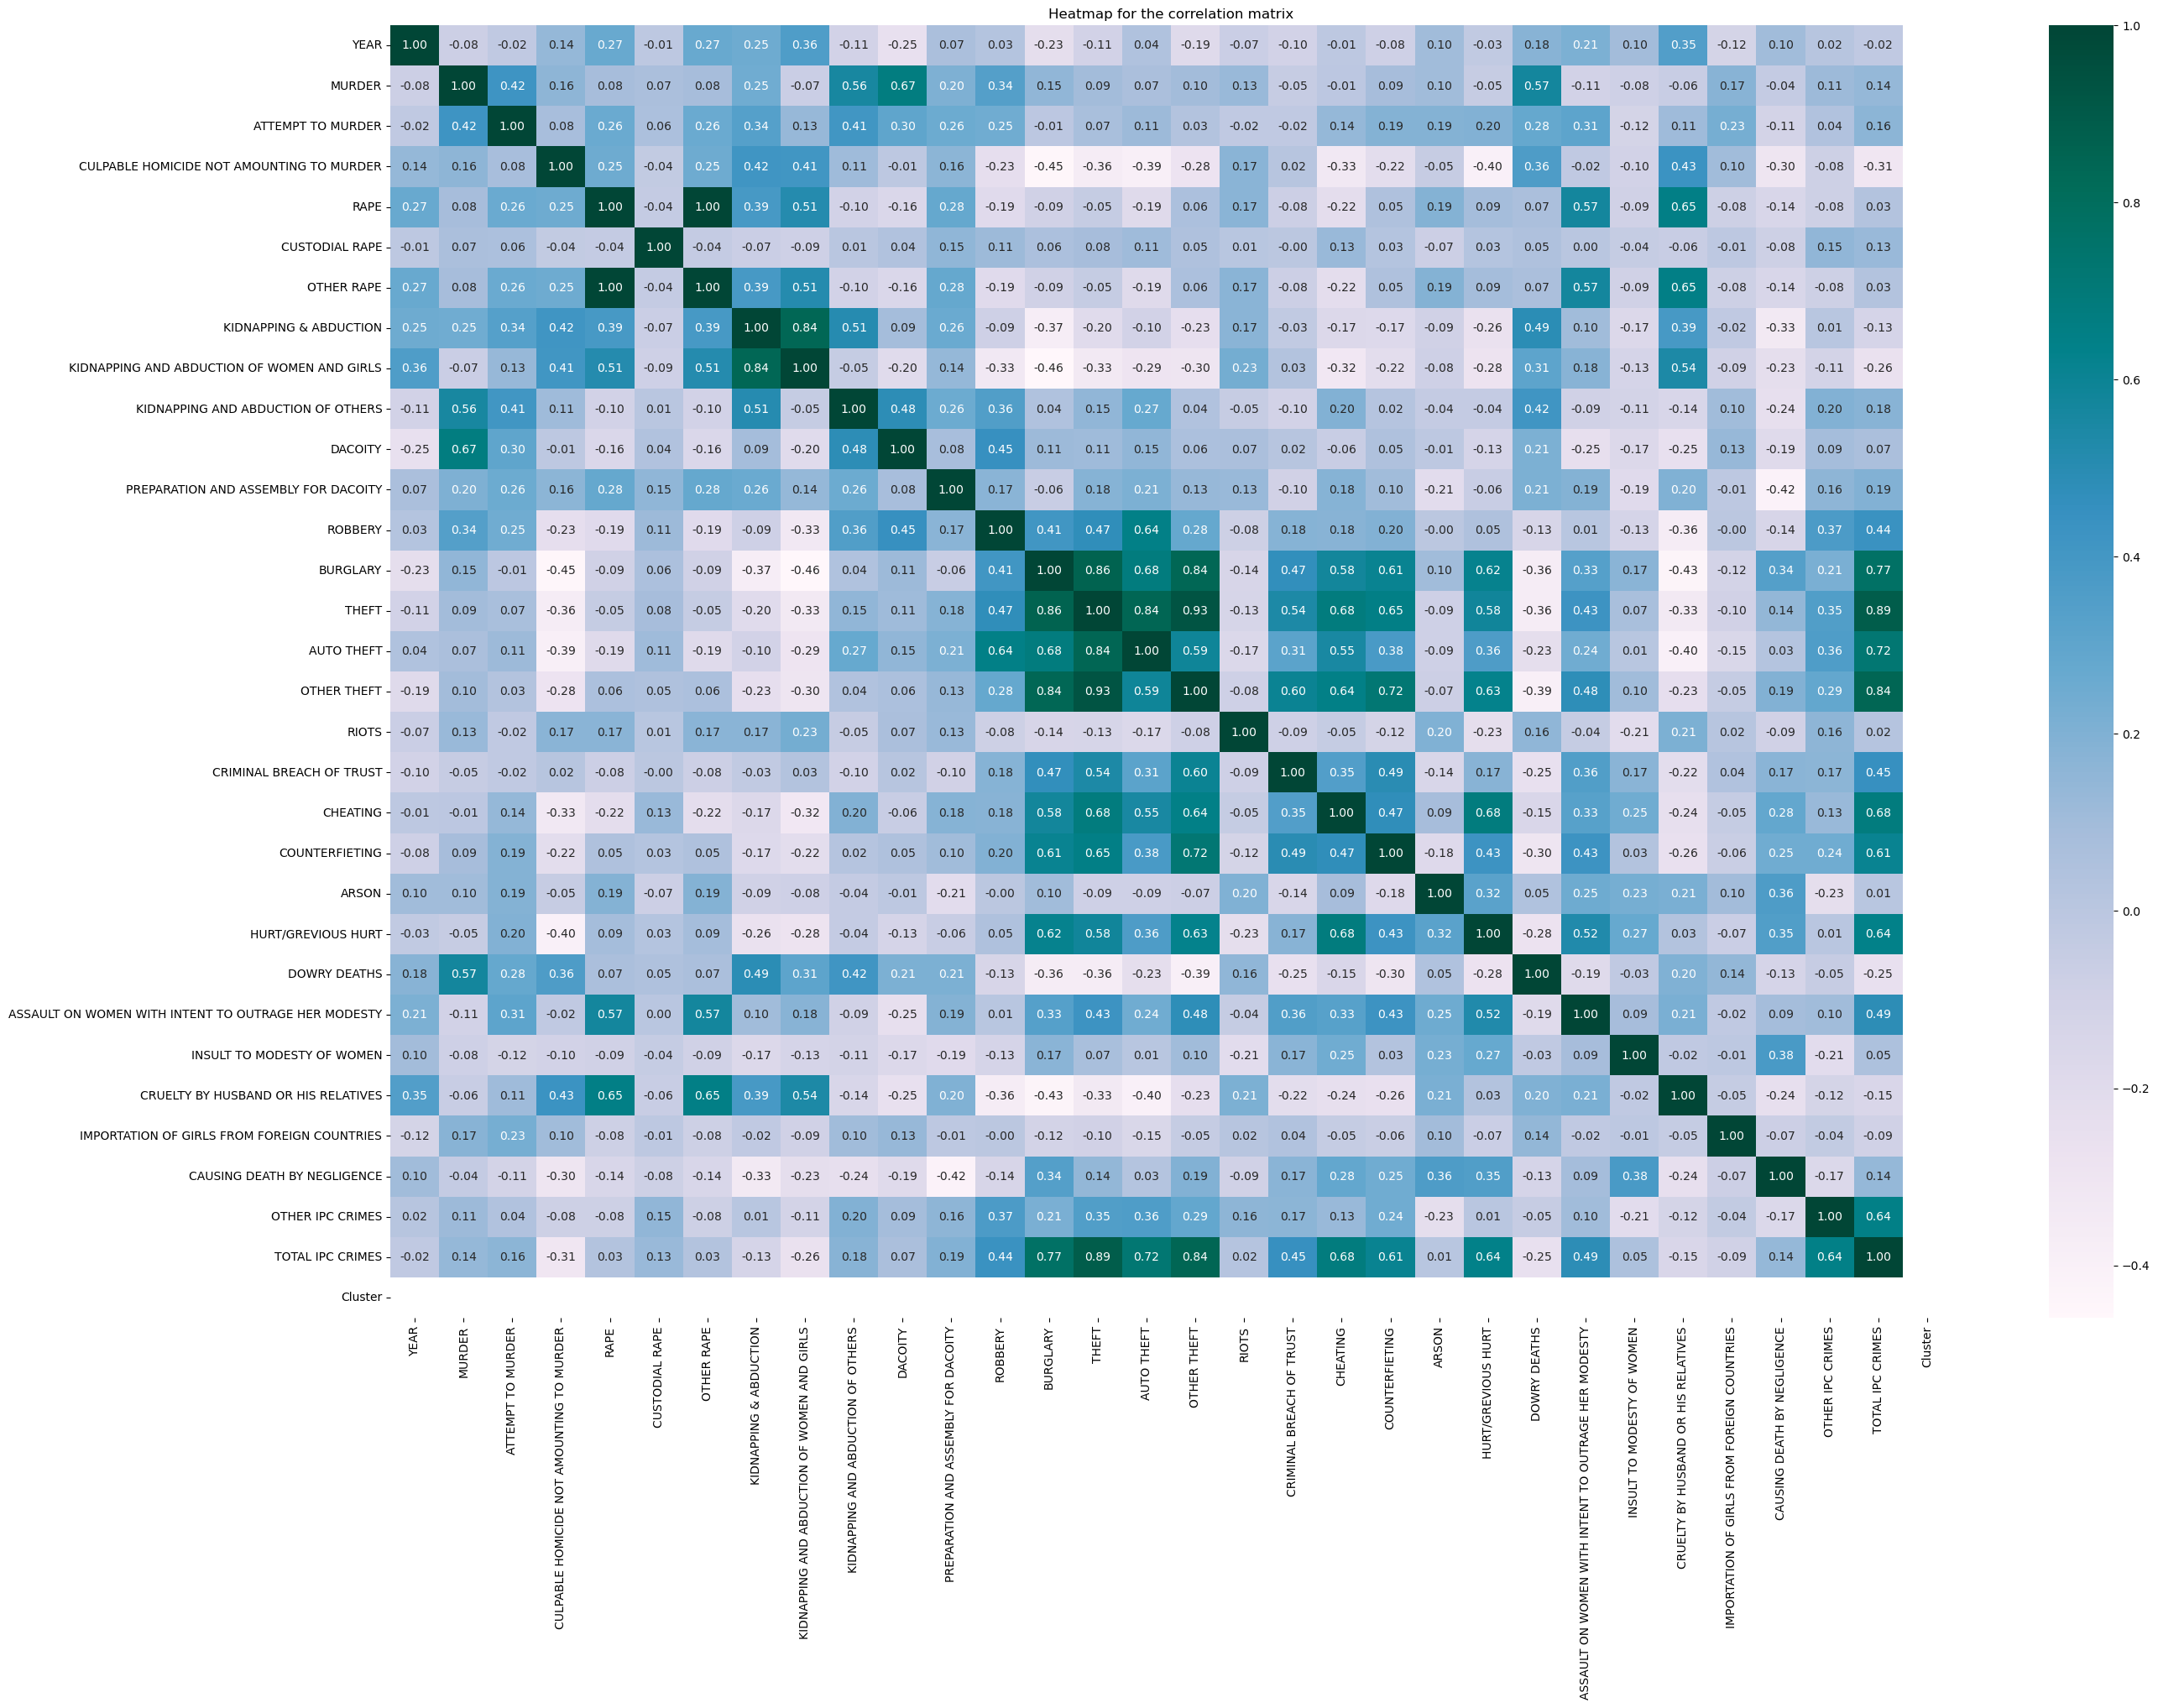

In [57]:
# checking heatmap
plt.figure(figsize=(30,20))
plt.title("Heatmap for the correlation matrix")
sns.heatmap(df_sensitive_area.corr(), annot=True, fmt="0.2f", cmap='PuBuGn')

from the correlation matrix viewed in heatmap we can say that there is some crimes which leads the area to be more sensitive and these crimes are RAPE, OTHER RAPE, DACOITY, MURDER, THEFT, AUTO THEFT, OTHER THEFT, COUNTERFIETING, BURGLARY, ROBBERY etc.

To overcome these probem police, government, laws in our country should take necessory steps as an when required. moreover citizen should be aware from any kind of crime.

In [60]:
# most safe and unsafe districts
print("Most safe districts:",df_peaceful_area['DISTRICT'].unique())

Most safe districts: ['CUDDAPAH' 'GUNTAKAL RLY.' 'SECUNDERABAD RLY.' 'SRIKAKULAM'
 'VIJAYAWADA RLY.' 'VISAKHA RURAL' 'VISAKHAPATNAM' 'VIZIANAGARAM'
 'CHANGLANG' 'DIBANG VALLEY' 'KAMENG EAST' 'KAMENG WEST' 'LOHIT'
 'PAPUM PARE' 'SIANG EAST' 'SIANG UPPER' 'SIANG WEST' 'SUBANSIRI LOWER'
 'SUBANSIRI UPPER' 'TAWANG' 'TIRAP' 'BARPETA' 'BONGAIGAON' 'C.I.D.'
 'DARRANG' 'DHEMAJI' 'DHUBRI' 'DIBRUGARH' 'G.R.P.' 'GOALPARA' 'GOLAGHAT'
 'HAILAKANDI' 'JORHAT' 'KAMRUP' 'KARBI ANGLONG' 'KARIMGANJ' 'KOKRAJHAR'
 'LAKHIMPUR' 'MORIGAON' 'N.C.HILLS' 'NALBARI' 'R.P.O.' 'SIBSAGAR'
 'TINSUKIA' 'ARWAL' 'AURANGABAD' 'BAGAHA' 'BANKA' 'BEGUSARAI' 'BHABHUA'
 'BHOJPUR' 'BUXAR' 'DARBHANGA' 'JAMALPUR RLY.' 'JAMUI' 'JEHANABAD'
 'KATIHAR' 'KATIHAR RLY.' 'KHAGARIA' 'KISHANGANJ' 'LAKHISARAI' 'MADHEPURA'
 'MADHUBANI' 'MUNGER' 'MUZAFFARPUR RLY.' 'NAUGACHIA' 'NAWADAH'
 'PATNA RLY.' 'SAHARSA' 'SHEIKHPURA' 'SHEOHAR' 'SITAMARHI' 'SUPAUL'
 'BALRAMPUR' 'BIZAPUR' 'DANTEWARA' 'DHAMTARI' 'GRP RAIPUR' 'JAGDALPUR'
 'JANJGIR' 'JASHPUR'

In [61]:
# most unsafe district
print("Most unsafe district: ", df_sensitive_area['DISTRICT'].unique())

Most unsafe district:  ['HYDERABAD CITY' 'PATNA' 'AHMEDABAD COMMR.' 'BANGALORE COMMR.' 'MUMBAI'
 'JAIPUR' 'KOLKATA' 'NORTH WEST' 'SOUTH' 'CYBERABAD' 'PUNE COMMR.'
 'LUCKNOW' '24 PARGANAS NORTH' 'NORTH-WEST' 'MUMBAI COMMR.' 'KANPUR NAGAR'
 '24 PARGANAS SOUTH' 'INDORE' 'THANE COMMR.' 'JALPAIGURI' 'GHAZIABAD'
 'MURSHIDABAD' 'CHENNAI' 'AGRA' 'NADIA' 'ALWAR']


## 4.4 story in my own words. Min 1000 words.

### "Decoding the Dynamics of Crime in India: A Comprehensive Analysis"

**Introduction:**

The "Crimes in India" capstone project, serves as a portal into the multifaceted world of criminal activities across the diverse states and union territories of the country. With a keen focus on understanding the patterns, trends, and socio-economic correlates of various crimes, the project endeavors to contribute meaningful insights to the broader discourse on crime prevention and law enforcement in India.

**Dataset Overview:**

The dataset encapsulates a wide array of crime-related information, spanning across different dimensions such as types of crimes, geographical locations, and time periods. The columns, including 'STATE/UT,' 'DISTRICT,' 'YEAR,' and a plethora of crime-specific categories, paint a detailed picture of the criminal landscape in India. Each row represents a unique intersection of time, place, and a myriad of criminal activities.

**Geographical Analysis:**

One of the primary lenses through which we explore the dataset is the geographical perspective. By categorizing crimes based on states and union territories, we aim to discern regional variations and identify areas that may exhibit unique crime patterns. This spatial analysis provides a foundational understanding of the distribution of criminal incidents across the vast and culturally diverse landscape of India.

**Temporal Trends:**

The temporal dimension is equally crucial in our exploration. Analyzing crime rates over the years allows us to identify temporal trends, spikes, or declines in criminal activities. Unraveling the temporal patterns can lead to valuable insights into the socio-economic, political, or cultural factors influencing crime rates at different points in time.

**Crime Categories and Clusters:**

The dataset encompasses a plethora of crime categories, ranging from violent crimes like murder and rape to property crimes such as theft and burglary. The inclusion of clustering information ('Cluster') suggests a deeper layer of analysis, potentially grouping regions based on similarities in crime profiles. Understanding these clusters could pave the way for targeted interventions and tailored law enforcement strategies.

**Violent Crimes: Murders and Attempted Murders:**

Starting with the most severe offenses, the dataset sheds light on murders, attempted murders, and culpable homicides. By dissecting the data, we can discern whether certain regions or time periods are more prone to such violent crimes. Additionally, understanding the interplay between attempted murders and successful homicides provides insights into the efficacy of law enforcement and the overall safety of communities.

**Crimes Against Women: Rape and Kidnapping:**

Crimes against women, a critical focus of our analysis, include rape and kidnapping. The dataset distinguishes between different forms of rape, shedding light on the prevalence of custodial rape and other forms. Kidnapping and abduction data further contribute to our understanding of the safety challenges faced by women in different regions.

**Property Crimes: Theft, Robbery, and Burglary:**

Moving to property crimes, the dataset captures incidents of theft, robbery, and burglary. By categorizing these crimes, we aim to identify hotspots for property-related offenses and analyze the impact of socio-economic factors on the likelihood of such incidents.

**White-Collar Crimes: Cheating, Counterfeiting, and Breach of Trust:**

Beyond the more overt crimes, the dataset delves into white-collar crimes such as cheating, counterfeiting, and criminal breach of trust. This facet of our analysis aims to uncover patterns in financial crimes and explore potential links to economic indicators in different regions.

**Crimes Against Marital Integrity: Dowry Deaths and Domestic Violence:**

Crimes against marital integrity, including dowry deaths and domestic violence, provide a glimpse into the social dynamics within households. Our analysis seeks to unveil patterns in these crimes, with a focus on regions where such offenses may be more prevalent.

**Insights from Clustering:**

The inclusion of a clustering variable ('Cluster') introduces a layer of complexity to our analysis. The clustering algorithm likely identifies regions with similar crime profiles, potentially unveiling hidden patterns that may not be immediately apparent. Understanding the characteristics of each cluster is pivotal for tailoring interventions and allocating resources effectively.

**Socio-Economic Correlates:**

To enrich our analysis, we explore socio-economic correlates such as unemployment rates, educational levels, and income disparities. By correlating these factors with crime rates, we aim to discern the underlying drivers of criminal behavior and identify areas where targeted socio-economic interventions may yield positive outcomes.

**Conclusion and Policy Implications:**

The "Crimes in India" project, encapsulated in the 'crimes_in_India.csv' dataset, serves as a comprehensive guide to understanding the diverse dimensions of criminal activities in the country. From violent crimes to property offenses and white-collar crimes, the dataset provides a rich tapestry for analysis. Geographical, temporal, and socio-economic perspectives enhance the depth of our exploration, allowing for nuanced insights into the factors influencing crime rates.

The identification of clusters through unsupervised learning opens avenues for targeted interventions, enabling law enforcement agencies and policymakers to address specific challenges faced by different regions. The socio-economic correlates further highlight the interconnectedness of crime and social dynamics, emphasizing the need for holistic approaches to crime prevention.

As we unravel the story within the dataset, the overarching goal is to contribute evidence-based insights that inform policy formulation, resource allocation, and community engagement strategies. By bridging the gap between data-driven analysis and real-world implications, the "Crimes in India" project aspires to be a catalyst for positive change, fostering safer and more secure communities across the diverse landscape of India.